Questo notebook consente l'analisi descrittiva delle PA in funzione dei bandi di gara realizzati nel 2017.

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

#import plotly.offline as py
#import plotly.plotly as py_on
#import plotly.graph_objs as go
#from plotly import tools
#import plotly.figure_factory as ff
#py.init_notebook_mode(connected=True)

from IPython.display import Image
from IPython.display import display

In [3]:
def showPlot(df, col):
   
    import matplotlib.pyplot as plt
    from matplotlib import rcParams
    rcParams.update({'figure.autolayout': True})

    bar_width = 0.8 #ampiezza barra
    opacity_1 = 0.4 #opacità barra
    opacity_2 = 0.8

    fig = plt.figure()
    ax1 = fig.add_subplot(111)  # Create matplotlib axes
    ax1.set_title(col)
    ax2 = ax1.twinx()  # Create another axes that shares the same x-axis as ax.

    ax1.bar(df[col], df["log_aggiudicazione"], bar_width, alpha=opacity_2, color='g')
    ax1.set_ylabel('Ammontare per '+col + "(scala logaritmica)", color='g')
    ax2.bar(df[col], df["count"], bar_width, alpha=opacity_1, color='b')
    ax2.set_ylabel('# Gare vinte per '+col, color='b')

    for tl in ax2.get_yticklabels():
        tl.set_color('b')
    for tl in ax1.get_yticklabels():
        tl.set_color('g')    
    for tl in ax1.get_xticklabels():
        tl.set_rotation(90)

    file_name = 'imgs/analisiPA_'+col+'.png'    
    plt.savefig(file_name) #png

    #plt.show
    plt.clf
    return file_name

In [4]:
file = "data/anac/anac_indicepa_2017.tsv"
df = pd.read_csv(file, sep="\t")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321761 entries, 0 to 1321760
Data columns (total 24 columns):
cfStrutturaProponente                1321761 non-null int64
cig                                  1321754 non-null object
denominazioneStrutturaProponente     1321602 non-null object
oggetto                              1321651 non-null object
sceltaContraente                     1321758 non-null object
importoAggiudicazione                1321760 non-null float64
importoSommeLiquidate                1321760 non-null float64
dataInizio                           1321761 non-null object
dataUltimazione                      1148870 non-null object
jsonPartecipanti                     1321761 non-null object
jsonAggiudicatari                    1321761 non-null object
totalePartecipanti                   1321761 non-null int64
totaleAggiudicatari                  1321761 non-null int64
totaleRaggruppamentopartecipanti     1321761 non-null int64
totaleRaggruppamentoAggiudicatari  

## Attributi di interesse

### Presenti nel dataset in input
1. tipologia_istat: tipologia istat della struttura proponente;
2. tipologia_amm: tipologia amministrazione;
3. regione: regione di appartenenza della struttura proponente;
4. provincia: provincia di appartenenza della struttura proponente;
5. comune: comune di appartenenza della struttura proponente;
6. sceltaContraente;
7. importoSommeLiquidate;
8. importoAggiudicazione;

### Attributi derivati
1. mese: mese in cui è stata aggiudicata la gara;
2. ammontare_cat: attributo categorico derivato da *importoAggiudicazione*. Sono definite le seguenti categorie:
    - (0,100]: per gare con ammontare da 10 a 100 euro;
    - (100,1000]: per gare con ammontare da 100 a 1000 euro;
    - (1000,10000]: per gare con ammontare da 1.000 a 10.000 euro;
    - (10000,100000]: per gare con ammontare da 10k a 100k euro;
    - (100000,1000000]: per gare con ammontare da 100k a 1M euro;
    - (1000000,10000000]: per gare con ammontare da 1M a 10M euro;

*Note*
- Il campo *sceltaContraente* necessita task di pre-processing


In [6]:
columns_to_analyze = ["mese_aggiudicazione","tipologia_istat","tipologia_amm", "regione", "provincia", "comune", "sceltaContraente", "importoSommeLiquidate","importoAggiudicazione"]

In [7]:
df['dataInizio'] = pd.to_datetime(df['dataInizio'], errors='coerce')
df['mese_aggiudicazione'] = df['dataInizio'].map(lambda x: str(x.month))

ammontare_range = [0, 100, 1000, 10000, 100000, 1000000, 100000000]
labels = ["0-100", "100-1k", "1k-10k", "10k-100k", "100k-1M", ">1M"]
df["ammontare_cat"] = pd.cut(df["importoAggiudicazione"], ammontare_range, labels= labels).astype(str)

In [8]:
df.head(5)

,cfStrutturaProponente,cig,denominazioneStrutturaProponente,oggetto,sceltaContraente,importoAggiudicazione,importoSommeLiquidate,dataInizio,dataUltimazione,jsonPartecipanti,...,denominazionePrimoaggiudicatario,cod_amm,regione,provincia,comune,indirizzo,tipologia_istat,tipologia_amm,mese_aggiudicazione,ammontare_cat
0,8010803,0000000000,COMUNE DI CINQUEFRONDI SERVIZI TECNICI,MANUTENZIONE RECINZIONE E MESSA IN SICUREZZA C...,06PROCEDURA NEGOZIATA SENZA PREVIA INDIZIONE D...,491.80,0.00,2017-12-20,NaN,"{""raggruppamento"":[],""partecipante"":[]}",...,Raggruppamento,c_c710,Calabria,RC,Cinquefrondi,Corso Garibaldi 103,Comuni e loro Consorzi e Associazioni,Pubbliche Amministrazioni,12,100-1k
1,8010803,0000000000,COMUNE DI CINQUEFRONDI SERVIZI TECNICI,MATERIALE VARIO PER MANUTENZIONE VERDE PUBBLICO,17AFFIDAMENTO DIRETTO EX ART 5 DELLA LEGGE N38191,423.08,0.00,2017-12-20,NaN,"{""raggruppamento"":[],""partecipante"":[{""codiceF...",...,SARFSA,c_c710,Calabria,RC,Cinquefrondi,Corso Garibaldi 103,Comuni e loro Consorzi e Associazioni,Pubbliche Amministrazioni,12,100-1k
2,8010803,0000000000,COMUNE DI CINQUEFRONDI SERVIZI TECNICI,FORNITURA ACQUA POTABILE 3 E 4 TRIMESTRE 2017,27CONFRONTO COMPETITIVO IN ADESIONE AD ACCORDO...,228658.08,0.00,2017-07-01,2017-12-31,"{""raggruppamento"":[],""partecipante"":[{""codiceF...",...,SORICAL SPA,c_c710,Calabria,RC,Cinquefrondi,Corso Garibaldi 103,Comuni e loro Consorzi e Associazioni,Pubbliche Amministrazioni,7,100k-1M
3,8010803,0000000000,COMUNE DI CINQUEFRONDI SERVIZI TECNICI,FORNITURA OLIO PER MISCELA,17AFFIDAMENTO DIRETTO EX ART 5 DELLA LEGGE N38191,183.70,183.70,2017-07-27,2017-12-04,"{""raggruppamento"":[],""partecipante"":[{""codiceF...",...,NUOVA MAA SORACE MICHELE,c_c710,Calabria,RC,Cinquefrondi,Corso Garibaldi 103,Comuni e loro Consorzi e Associazioni,Pubbliche Amministrazioni,7,100-1k
4,8010803,0000000000,COMUNE DI CINQUEFRONDI SERVIZI TECNICI,ACQUISTO TRAMITE MEPA MATERIALE PER MANUTENZI...,17AFFIDAMENTO DIRETTO EX ART 5 DELLA LEGGE N38191,244.33,244.33,2017-11-14,2017-11-30,"{""raggruppamento"":[],""partecipante"":[{""codiceF...",...,AUDDINO EDILIZIA SRL,c_c710,Calabria,RC,Cinquefrondi,Corso Garibaldi 103,Comuni e loro Consorzi e Associazioni,Pubbliche Amministrazioni,11,100-1k


## Visualizzazione Statistiche

Per ogni variabile in analisi si analizzano solo i top 30 valori in termine di Ammontare.
L'ammontare è rappresentato su scala logaritmica in modo che valori caratterizzati da differenti ordini di grandezza siano facilmente visualizzabili.

In [9]:
columns_to_visualize = ["ammontare_cat","mese_aggiudicazione","tipologia_istat","tipologia_amm", "regione", "provincia", "comune", "sceltaContraente"]

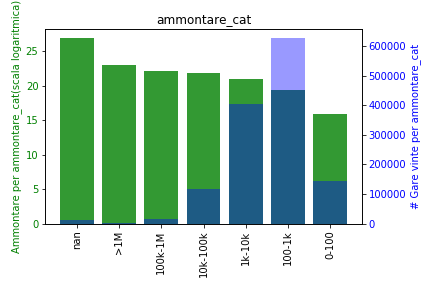

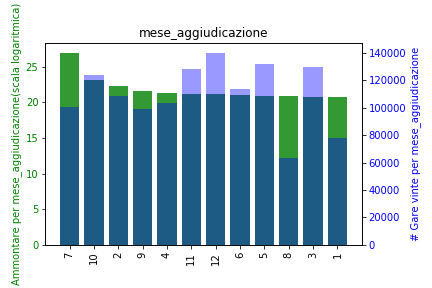

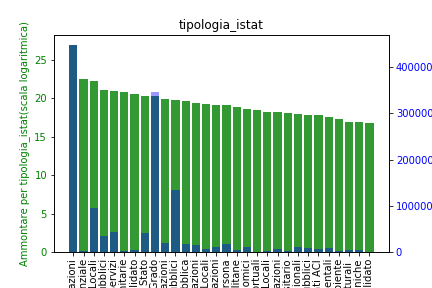

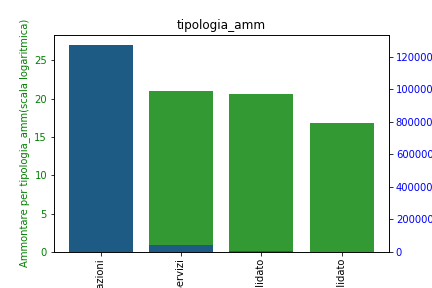

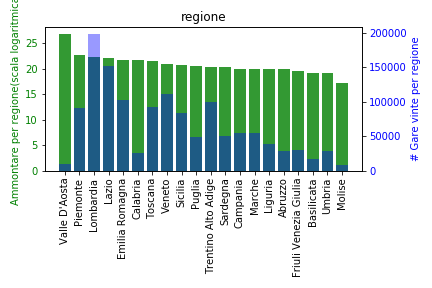

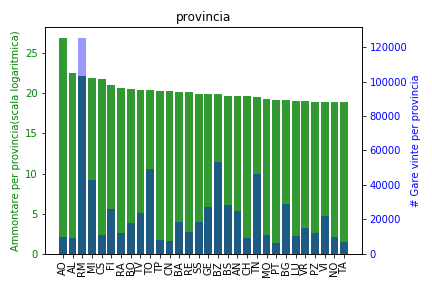

/Users/fabiana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


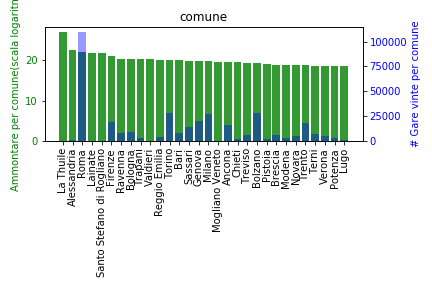

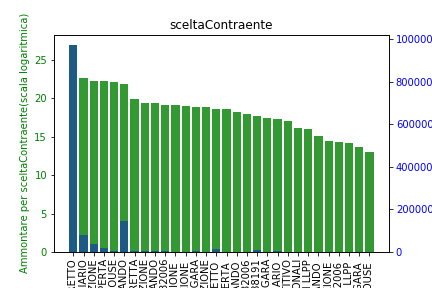

/Users/fabiana/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


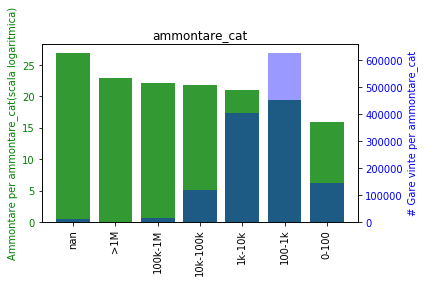

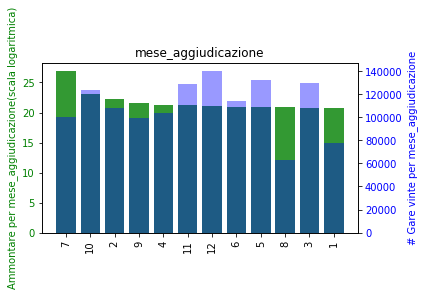

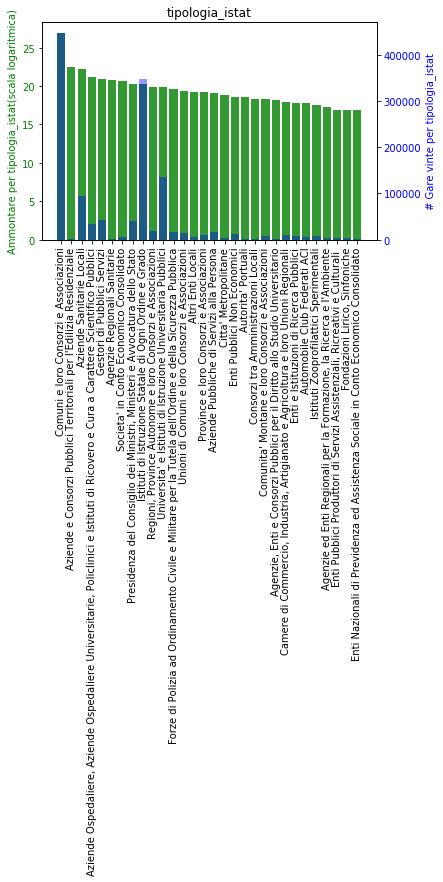

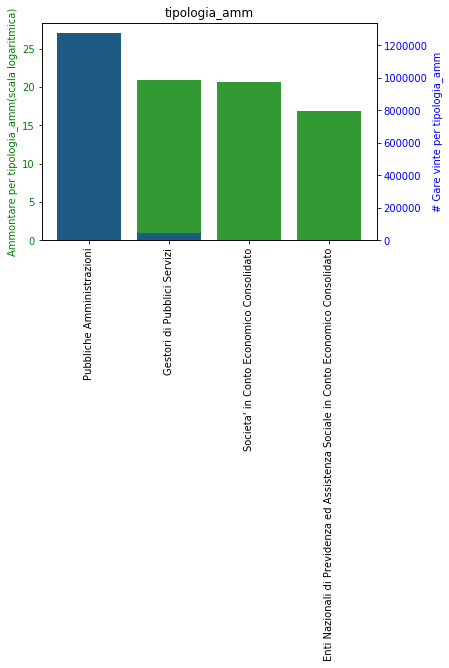

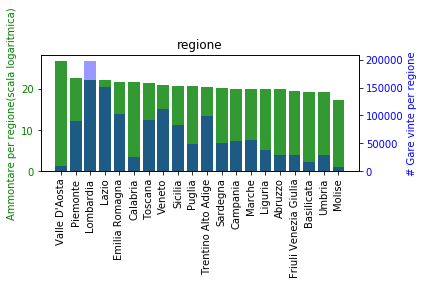

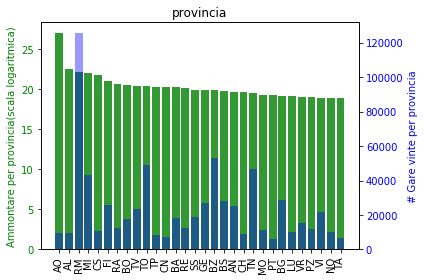

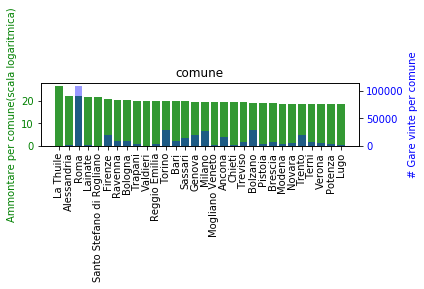

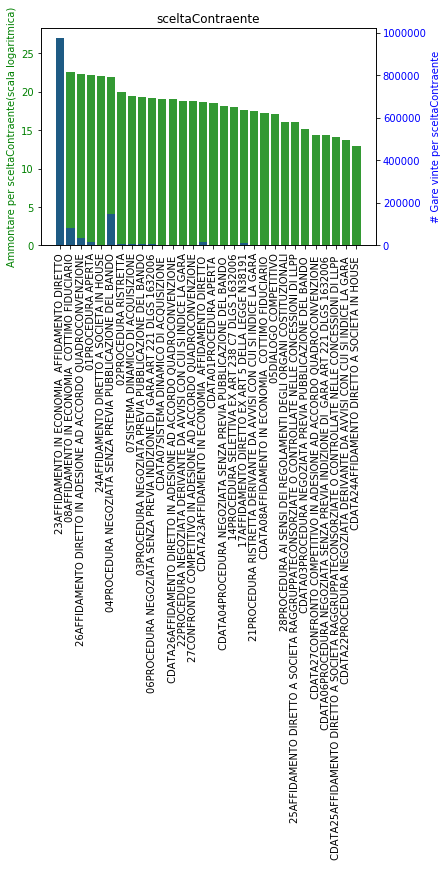

In [10]:
for col in columns_to_visualize:
    df_sum = df[[col, "importoAggiudicazione"]].groupby([col]).sum().sort_values("importoAggiudicazione",ascending=False).reset_index()
    series_count = df[col].value_counts().reset_index()
    df_count =pd.DataFrame(series_count).rename(columns={col: 'count','index': col})
    df_merged = pd.merge(df_sum, df_count, how='inner', on=[col, col])
    df_merged["log_aggiudicazione"] = np.log(df_merged["importoAggiudicazione"])
    df_merged = df_merged.sort_values("importoAggiudicazione", ascending= False).head(30)
    
    file_name = showPlot(df_merged, col)
    i = Image(file_name)
    display(i)